In [55]:
import pandas as pd 
import numpy as np
from sklearn.metrics import r2_score,confusion_matrix,mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV




In [56]:
import xgboost
import catboost
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings

In [57]:
data = pd.read_csv('stud.csv')
data.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [58]:
x = data.drop(columns= ['math_score'],axis=1)
y = data['math_score']

In [59]:
y.head()


0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [60]:
# creating column transformer with 3 transformers
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
ohe_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",ohe_transformer,cat_features),
        ("standderedScalar",numeric_transformer,num_features),

    ]
)

In [61]:
x = preprocessor.fit_transform(x)

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape ,x_test.shape

((800, 19), (200, 19))

In [63]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true,  predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae,rmse,r2

In [64]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "Catboost Regressor": CatBoostRegressor(verbose=False),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train) 

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae,model_train_rmse,model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('model performance for training data')
    print("Mean Absolute error :{:.4f}".format(model_train_mae))
    print("Root mean squared error :{:.4f}".format(model_train_rmse))
    print("R2 score :{:.4f}".format(model_train_r2))
    
    print ("-------------------------------------")

    print('model performance for testing  data')
    print("Mean Absolute error :{:.4f}".format(model_test_mae))
    print("Root mean squared error :{:.4f}".format(model_test_rmse))
    print("R2 score :{:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
   

    print('='*35)
    print('\n')


Linear Regression
model performance for training data
Mean Absolute error :4.2667
Root mean squared error :5.3231
R2 score :0.8743
-------------------------------------
model performance for testing  data
Mean Absolute error :4.2148
Root mean squared error :5.3940
R2 score :0.8804


Ridge Regression
model performance for training data
Mean Absolute error :4.2650
Root mean squared error :5.3233
R2 score :0.8743
-------------------------------------
model performance for testing  data
Mean Absolute error :4.2111
Root mean squared error :5.3904
R2 score :0.8806


Lasso Regression
model performance for training data
Mean Absolute error :5.2063
Root mean squared error :6.5938
R2 score :0.8071
-------------------------------------
model performance for testing  data
Mean Absolute error :5.1579
Root mean squared error :6.5197
R2 score :0.8253


K-Neighbors Regressor
model performance for training data
Mean Absolute error :4.5177
Root mean squared error :5.7088
R2 score :0.8554
---------------

In [65]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
1,Ridge Regression,0.880593
0,Linear Regression,0.880433
7,AdaBoost Regressor,0.854418
6,Random Forest Regressor,0.853400
5,Catboost Regressor,0.851632
4,XGBoost Regressor,0.827797
2,Lasso Regression,0.825320
3,K-Neighbors Regressor,0.784030
8,Decision Tree Regressor,0.773916


In [72]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)



Accuracy of the model is 88.04


Text(0, 0.5, 'Predicted')

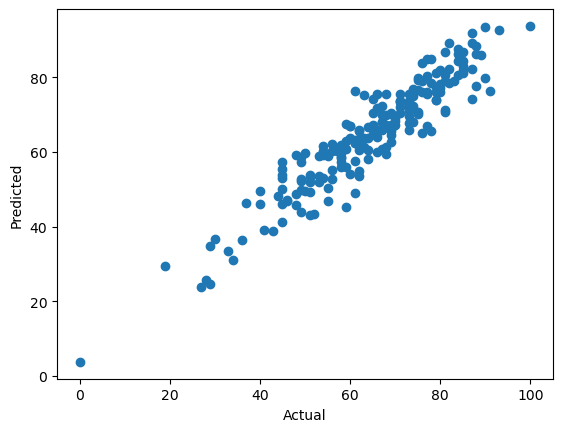

In [73]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')


<Axes: xlabel='math_score'>

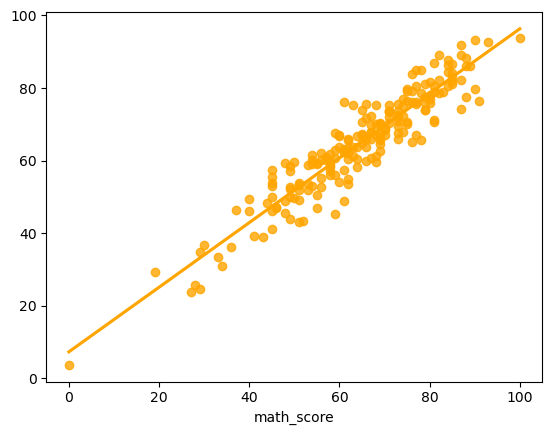

In [74]:
import seaborn as sns
sns.regplot(x = y_test,y = y_pred,ci =None,color='orange')

In [75]:
pred_data = pd.DataFrame({'Actual value':y_test,'Predicted_value':y_pred,'Difference':y_test-y_pred})

In [76]:
pred_data

,Actual value,Predicted_value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
